# DEM to Hillshade

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

### Utils

In [2]:
def hillshade(dem, azimuth=315, altitude=45, cellsize=1.0):
    az = np.deg2rad(azimuth)
    alt = np.deg2rad(altitude)

    x, y = np.gradient(dem, cellsize)
    slope = np.pi/2 - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)

    shaded = (
        np.sin(alt) * np.sin(slope) +
        np.cos(alt) * np.cos(slope) * np.cos(az - aspect)
    )

    return np.clip(shaded, 0, 1)

### Loading DEM

In [ ]:
src_dem_file = r"D:\GitHubProjects\Terranum_repo\LandSlides\segformerlandslides\data\test_dem\wabern_sattle_area.tif"

(2000, 2000)


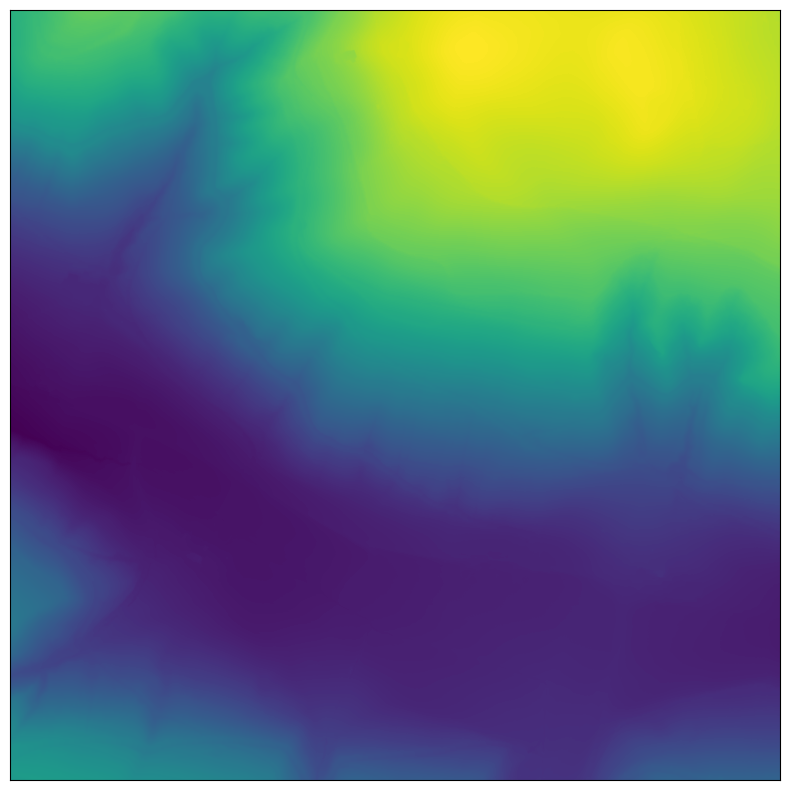

In [37]:
img = Image.open(src_dem_file)
dem_arr = np.array(img)
print(dem_arr.shape)
fig = plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(dem_arr)

(2000, 2000)


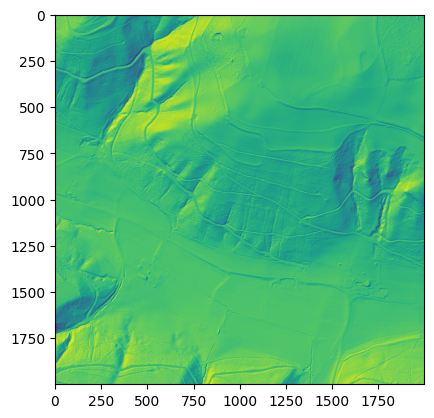

In [13]:
hillshade_test = hillshade(dem_arr)
print(hillshade_test.shape)
plt.imshow(hillshade_test)

### Multiple angles visualization

In [32]:
azimuths = [0, 45, 90, 135, 180, 225, 270, 315]
cardinals = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
altitudes = [15, 30, 45, 60]

In [17]:
# compute hillshades
hillshades = {}
for id_az, az in enumerate(azimuths):
    hillshades[az] = {}
    for id_alt, alt in enumerate(altitudes):
        hillshades[az][alt] = hillshade(dem_arr, az, alt)


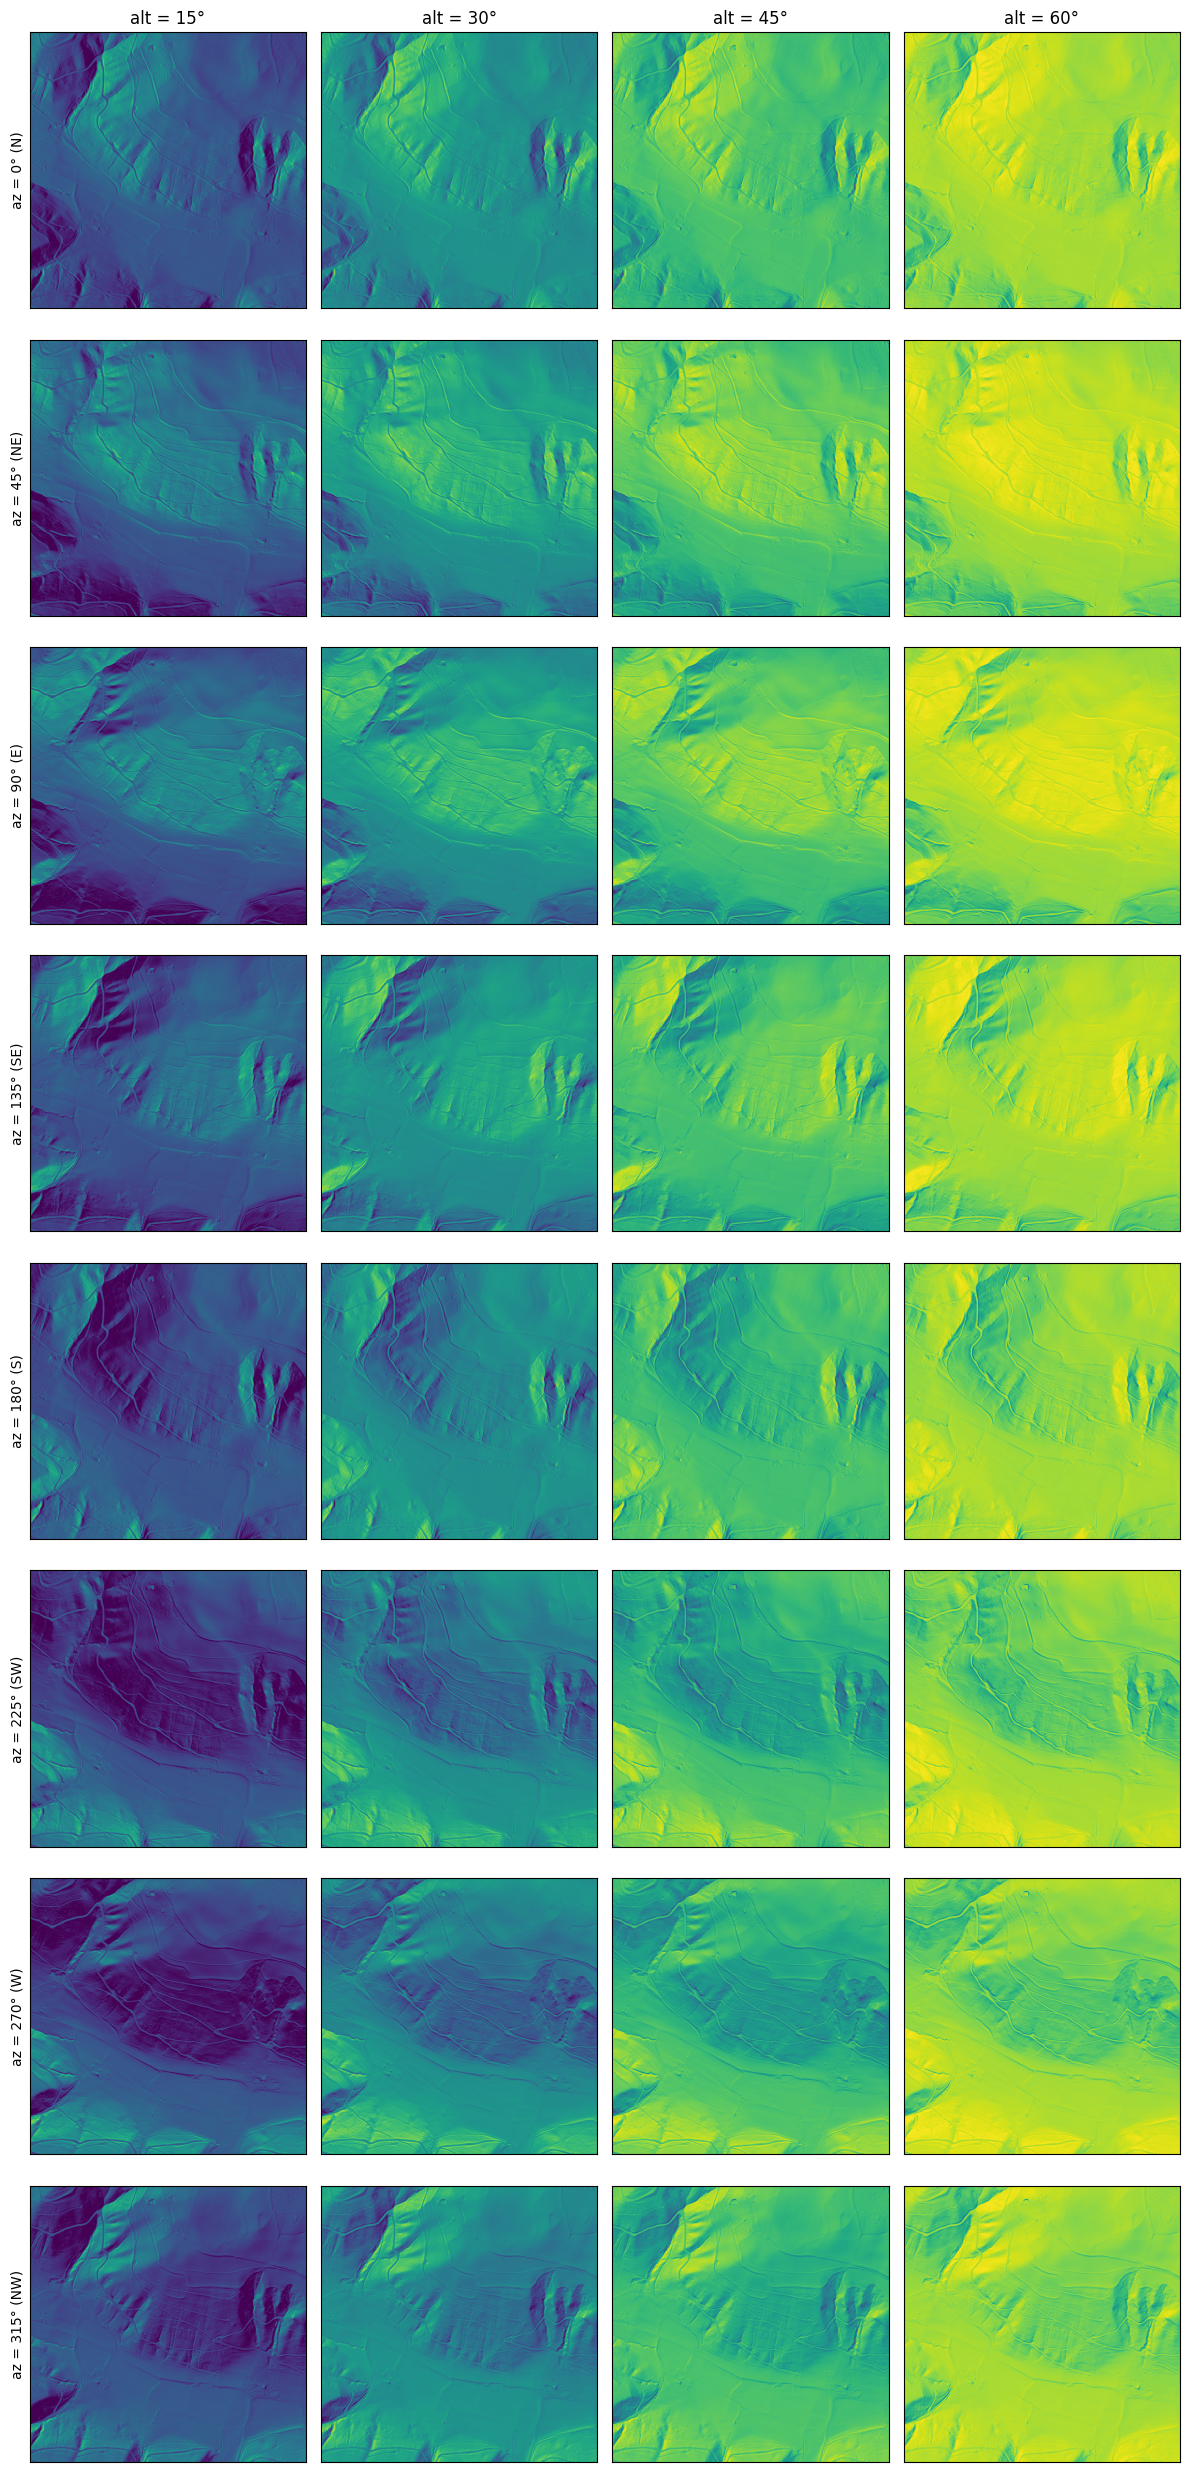

In [33]:
fig, axs = plt.subplots(len(azimuths), len(altitudes), figsize=(12, 25))
for id_az, az in enumerate(azimuths):
    for id_alt, alt in enumerate(altitudes):
        ax = axs[id_az, id_alt]
        hs = hillshades[az][alt]
        ax.imshow(hs)
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
        if id_az == 0:
            ax.set_title(f"alt = {alt}°")
        if id_alt == 0:
            ax.set_ylabel(f"az = {az}° ({cardinals[id_az]})")
fig.tight_layout()